<h1> Pesquisa em bancos de dados para astronomia</h1>

Primeiramente e necessario que o usuario tenha instalado no seu computador os modulos: numpy, pandas, astroquery, astropy, seaborn e matplotlib. O modulo Astrofunctions e um documento .py , criado pelo Rafael, que precisa estar alocado no mesmo diretorio que o codigo sera colocado.
Para instalacao dos modulos extras e necessario abrir o Terminal e digitar o comando pip install O_nome_do_modulo_de_interesse. O comando e o mesmo para usuarios do mac e para usuarios da distribuicao do anaconda no windows.  

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import astropy.units as u
import math
from astroquery.ned import Ned
from astroquery.simbad import Simbad
from astropy.table import Table,QTable
from astropy import coordinates

#Modulos autorais
import AstroFunctions as astro
from UnitConversion import hmstodegree, dmstodegree


Utilizando o modulo Pandas, o proximo passo e ler um arquivo csv alocado no endereco entre 
(""). Apos a leitura desse arquivo, o comando vvds[].values serve apara alocar em uma array 
os valores contidos na coluna intitulada "RA"

In [2]:
vvds = pd.read_csv("vvds-not.csv")
RA = vvds["RA"].values
DEC = vvds["DEC"].values

In [197]:
vvds.keys()

Index(['Unnamed: 0', 'ID', 'RA', 'DEC', 'z', 'z_Err', 'flag', 'source',
       'comments', 'totobs', 'totexp'],
      dtype='object')

Para que seja possivel percorrer varias regioes relacionadas aos varios valores contidos na coluna que descreve as coordenadas e necessario realizar a pesquisa com o auxilio de um for que percorre todas as linhas das arrays e pesquisa regiao por regiao.


Com relação ao astroquery, ele possui um tempo limite de conexão com o servidor que e pequeno, por isso para uma pesquisa de muitos dados e necessário alterar o valor da variável timeout na pasta em que o modulo astroquery foi instalado e na respectiva pasta do banco de dados.

In [112]:
#Pesquisa no banco de dados NED
array_ned= []
for i in range(len(RA)):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    tabela = Ned.query_region(co, radius=0.0007* u.deg) #sugestao 0.0007
    if len(tabela)>1:
        for j in range(len(tabela)-1):
            distancia1 = math.sqrt((math.radians(tabela['DEC'][0])-math.radians(DEC[i]))**2 + (math.radians(tabela['RA'][0])-math.radians(RA[i]))**2)
            distancia1 = math.sqrt((math.radians(tabela['DEC'][1])-math.radians(DEC[i]))**2 + (math.radians(tabela['RA'][1])-math.radians(RA[i]))**2)                      
            if distancia1 > distancia2:
                tabela.remove_row(0)
            else:
                tabela.remove_row(1)         
    df = tabela.to_pandas()
    array_ned.append(df)

In [113]:
#Pesquisa no banco de dados SIMBAD
array_simbad = []
for i in range(len(RA)):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    #Pesquisa no banco de dados NED
    tabela = Simbad.query_region(co, radius=0.0007* u.deg) #sugestao 0.0007
    if len(tabela)>1:
        for j in range(len(tabela)-1):
            distancia1 = math.sqrt((math.radians(dmstodegree([tabela['DEC'][0]])[0])-math.radians(DEC[i]))**2 + (math.radians(hmstodegree([tabela['RA'][0]])[0])-math.radians(RA[i]))**2)
            distancia1 = math.sqrt((math.radians(dmstodegree([tabela['DEC'][1]])[0])-math.radians(DEC[i]))**2 + (math.radians(hmstodegree([tabela['RA'][1]])[0])-math.radians(RA[i]))**2)                      
            if distancia1 > distancia2:
                tabela.remove_row(0)
            else:
                tabela.remove_row(1)         
    df = tabela.to_pandas()
    array_simbad.append(df)

In [115]:
simbad = pd.concat(array_simbad, axis = 0, ignore_index = True)
ned = pd.concat(array_ned, axis = 0, ignore_index = True)  

In [1]:
ned

NameError: name 'ned' is not defined

In [187]:
simbad.keys()

Index(['MAIN_ID', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA',
       'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH',
       'COO_BIBCODE'],
      dtype='object')

In [188]:
ned.keys()

Index(['No.', 'Object Name', 'RA', 'DEC', 'Type', 'Velocity', 'Redshift',
       'Redshift Flag', 'Magnitude and Filter', 'Separation', 'References',
       'Notes', 'Photometry Points', 'Positions', 'Redshift Points',
       'Diameter Points', 'Associations'],
      dtype='object')

In [119]:
ObjectNameNed = []
for i in range(len(ned)):
    teste = str(ned['Object Name'][i]).split('b\'')
    ObjectNameNed.append(teste[1].split(' ')[0])

In [120]:
MainIdSimbad = []
for i in range(len(ned)):
    teste = str(simbad['MAIN_ID'][i]).split('b\'')
    MainIdSimbad.append(teste[1].split(' ')[0])

In [121]:
MainIdSimbad = np.asarray(MainIdSimbad)
SimbadSurvey = np.unique(MainIdSimbad)

ObjectNameNed = np.asarray(ObjectNameNed)
NedSurvey = np.unique(ObjectNameNed)


In [176]:
simbad_degree = simbad.replace(simbad["RA"].values ,hmstodegree(simbad["RA"].values))
simbad_degree = simbad_degree.replace(simbad_degree["DEC"].values ,dmstodegree(simbad["DEC"].values))


In [179]:
SimbadSurveyXRA = {}
for i in range(len(SimbadSurvey)):
    SimbadSurveyXRA[SimbadSurvey[i]] = []
    for j in range(len(simbad)):
        variavel = str(simbad['MAIN_ID'][j]).split('b\'')
        if variavel[1].split(' ')[0] == SimbadSurvey[i]:
            SimbadSurveyXRA[SimbadSurvey[i]].append(simbad_degree['RA'][j])

In [180]:
SimbadSurveyXDEC = {}
for i in range(len(SimbadSurvey)):
    SimbadSurveyXDEC[SimbadSurvey[i]] = []
    for j in range(len(simbad)):
        variavel = str(simbad['MAIN_ID'][j]).split('b\'')
        if variavel[1].split(' ')[0] == SimbadSurvey[i]:
            SimbadSurveyXDEC[SimbadSurvey[i]].append(simbad_degree['DEC'][j])

In [184]:
SimbadSurveyXlen = {}
for i in range(len(list(SimbadSurveyXRA))):
    SimbadSurveyXlen[list(SimbadSurveyXRA)[i]] = len(SimbadSurveyXRA[list(SimbadSurveyXRA)[i]])

In [182]:
NedSurveyXredshift = {}
for i in range(len(NedSurvey)):
    NedSurveyXredshift[NedSurvey[i]] = []
    for j in range(len(ned)):
        variavel = str(ned['Object Name'][j]).split('b\'')
        if variavel[1].split(' ')[0] == NedSurvey[i]:
            NedSurveyXredshift[NedSurvey[i]].append(ned['Redshift'][j])

In [148]:
NedSurveyXRA = {}
for i in range(len(NedSurvey)):
    NedSurveyXRA[NedSurvey[i]] = []
    for j in range(len(ned)):
        variavel = str(ned['Object Name'][j]).split('b\'')
        if variavel[1].split(' ')[0] == NedSurvey[i]:
            NedSurveyXRA[NedSurvey[i]].append(ned['RA'][j])

In [149]:
NedSurveyXDEC = {}
for i in range(len(NedSurvey)):
    NedSurveyXDEC[NedSurvey[i]] = []
    for j in range(len(ned)):
        variavel = str(ned['Object Name'][j]).split('b\'')
        if variavel[1].split(' ')[0] == NedSurvey[i]:
            NedSurveyXDEC[NedSurvey[i]].append(ned['DEC'][j])

In [155]:
NedSurveyXlen = {}
for i in range(len(list(NedSurveyXRA))):
    NedSurveyXlen[list(NedSurveyXRA)[i]] = len(NedSurveyXRA[list(NedSurveyXRA)[i]])

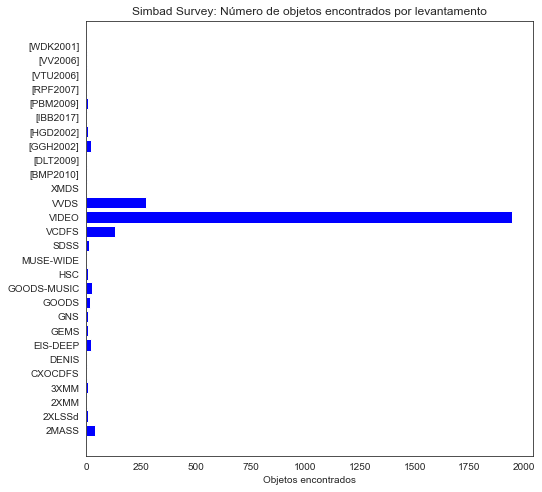

In [185]:
levantamentos = [i for i in SimbadSurveyXlen.keys()]
quantidade = [j for j in SimbadSurveyXlen.values()]
pos = np.arange(len(levantamentos))
fig = plt.figure(figsize = (8,8))
plt.barh(pos, quantidade, align = 'center', color = 'blue')
plt.yticks(pos, levantamentos)
plt.xlabel('Objetos encontrados')
plt.title('Simbad Survey: Número de objetos encontrados por levantamento')
plt.show()



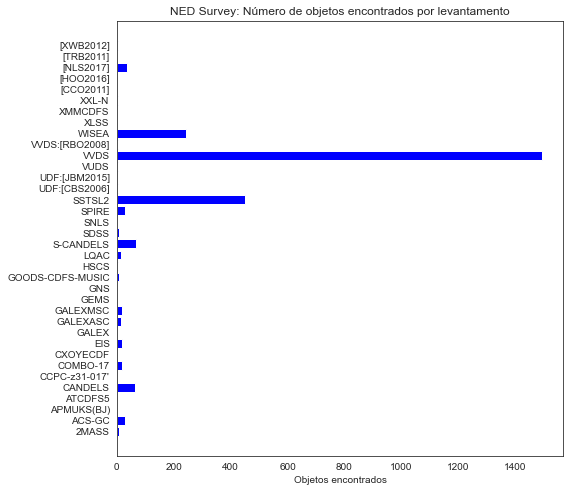

In [163]:
levantamentos = [i for i in NedSurveyXlen.keys()]
quantidade = [j for j in NedSurveyXlen.values()]
pos = np.arange(len(levantamentos))
fig = plt.figure(figsize = (8,8))
plt.barh(pos, quantidade, align = 'center', color = 'blue')
plt.yticks(pos, levantamentos)
plt.xlabel('Objetos encontrados')
plt.title('NED Survey: Número de objetos encontrados por levantamento')
plt.show()


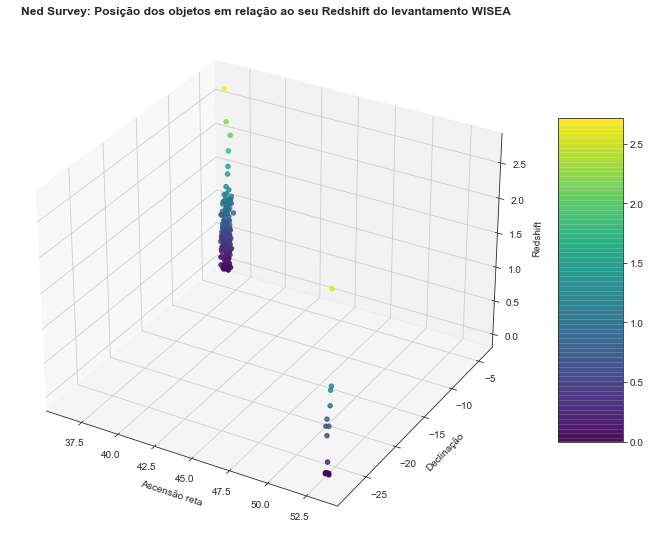

In [200]:
fig = plt.figure(figsize = (9,9))
ax = Axes3D(fig)

sequence_containing_x_vals = NedSurveyXRA['WISEA']
sequence_containing_y_vals = NedSurveyXDEC['WISEA']
sequence_containing_z_vals = NedSurveyXredshift['WISEA']

color_map = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, alpha = 0.8, c = sequence_containing_z_vals, cmap = 'viridis', marker = 'o')
fig.colorbar(sctt,ax = ax, shrink = 0.5, aspect = 5)

plt.title("Ned Survey: Posição dos objetos em relação ao seu Redshift do levantamento WISEA", fontweight = 'bold')
ax.set_xlabel('Ascensão reta')
ax.set_ylabel('Declinação')
ax.set_zlabel('Redshift')
plt.show()


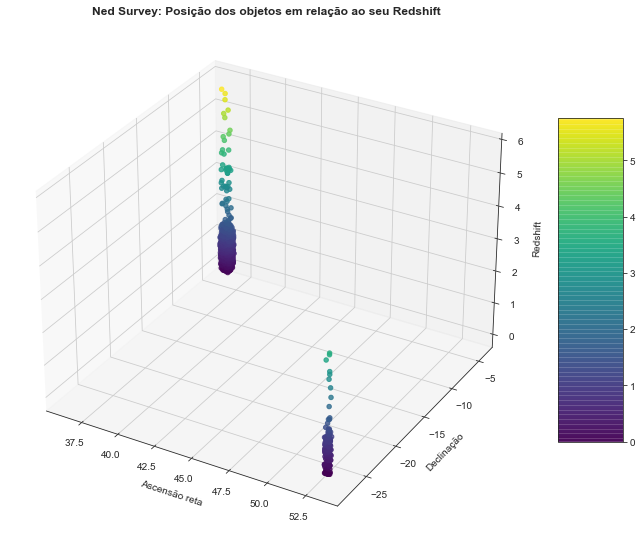

In [164]:
fig = plt.figure(figsize = (9,9))
ax = Axes3D(fig)

sequence_containing_x_vals = ned['RA']
sequence_containing_y_vals = ned['DEC']
sequence_containing_z_vals = ned['Redshift']

color_map = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, alpha = 0.8, c = sequence_containing_z_vals, cmap = 'viridis', marker = 'o')
fig.colorbar(sctt,ax = ax, shrink = 0.5, aspect = 5)

plt.title("Ned Survey: Posição dos objetos em relação ao seu Redshift", fontweight = 'bold')
ax.set_xlabel('Ascensão reta')
ax.set_ylabel('Declinação')
ax.set_zlabel('Redshift')
plt.show()

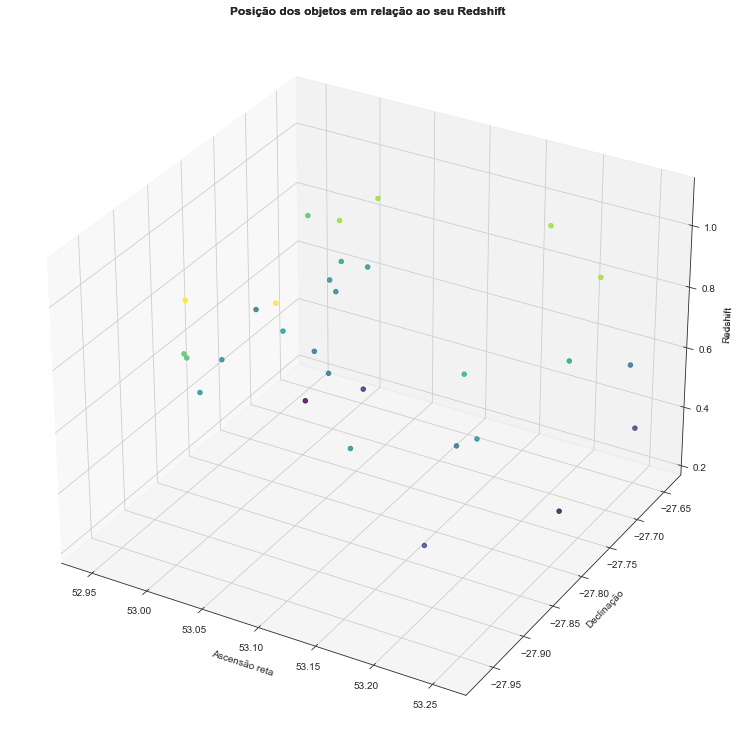

In [175]:
fig = plt.figure(figsize = (10,10))
for i in range(2):
    
    ax = fig.add_subplot(11+i, projection='3d')
    ax = Axes3D(fig)
    sequence_containing_x_vals = NedSurveyXRA[list(NedSurveyXRA)[i]]
    sequence_containing_y_vals = NedSurveyXDEC[list(NedSurveyXDEC)[i]]
    sequence_containing_z_vals = NedSurveyXredshift[list(NedSurveyXredshift)[i]]

    color_map = plt.get_cmap('hsv')

    sctt = ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, alpha = 0.8, c = sequence_containing_z_vals, cmap = 'viridis', marker = 'o')

    plt.title("Posição dos objetos em relação ao seu Redshift", fontweight = 'bold')
    ax.set_xlabel('Ascensão reta')
    ax.set_ylabel('Declinação')
    ax.set_zlabel('Redshift')
plt.show()


In [32]:
tabela['DEC'][0]

-4.8195

In [9]:
ned_table = Table.from_pandas(ned)
simbad_table = Table.from_pandas(simbad_convertido)

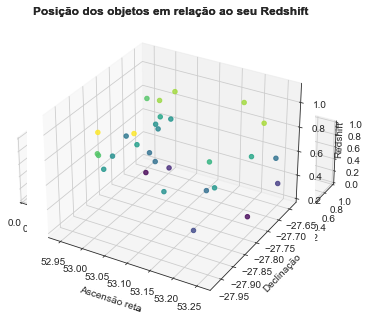

In [196]:
fig = plt.figure()
    
ax = fig.add_subplot(121, projection='3d')
ax = Axes3D(fig)
sequence_containing_x_vals = NedSurveyXRA[list(NedSurveyXRA)[i]]
sequence_containing_y_vals = NedSurveyXDEC[list(NedSurveyXDEC)[i]]
sequence_containing_z_vals = NedSurveyXredshift[list(NedSurveyXredshift)[i]]

color_map = plt.get_cmap('hsv')

sctt = ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, alpha = 0.8, c = sequence_containing_z_vals, cmap = 'viridis', marker = 'o')

plt.title("Posição dos objetos em relação ao seu Redshift", fontweight = 'bold')
ax.set_xlabel('Ascensão reta')
ax.set_ylabel('Declinação')
ax.set_zlabel('Redshift')

ax1 = fig.add_subplot(122, projection='3d')
ax1 = Axes3D(fig)
sequence_containing_x_vals = NedSurveyXRA[list(NedSurveyXRA)[1]]
sequence_containing_y_vals = NedSurveyXDEC[list(NedSurveyXDEC)[1]]
sequence_containing_z_vals = NedSurveyXredshift[list(NedSurveyXredshift)[1]]

color_map = plt.get_cmap('hsv')

sctt = ax1.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, alpha = 0.8, c = sequence_containing_z_vals, cmap = 'viridis', marker = 'o')

plt.title("Posição dos objetos em relação ao seu Redshift", fontweight = 'bold')
ax1.set_xlabel('Ascensão reta')
ax1.set_ylabel('Declinação')
ax1.set_zlabel('Redshift')

plt.show()